In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#Import Women Means Data
Women = pd.read_csv('Women_Means_Dataset.csv')
Women

Formal_Education  Position  Years_Coding         Salary   Age
0          3.839506  3.814815      3.197531   22663.080247  19.5
1          4.387805  3.407317      3.409756   21676.941463  23.0
2          4.751055  2.976793      4.496835   41599.448312  27.0
3          4.998721  2.561381      6.695652   53419.576726  32.0
4          5.038697  3.028513      8.930754   62256.127291  37.0
5          5.054131  2.954416      9.760684   64228.849003  42.0
6          4.497585  3.072464     10.748792   69869.065217  47.0
7          5.088235  3.227941     10.970588   62942.514706  52.0
8          4.875000  2.812500     10.781250   99460.437500  57.0
9          5.186047  3.418605     12.255814  101720.453488  64.5

In [3]:
#Import Men Means Data
Men = pd.read_csv('Men_Means_Dataset.csv')
Men

Formal_Education  Position  Years_Coding        Salary   Age
0          3.950119  3.505938      3.356295  26373.016627  19.5
1          4.358566  3.530323      3.474989  24580.509739  23.0
2          4.624508  3.170928      4.844807  38902.087628  27.0
3          4.754254  3.093474      7.292053  57561.585397  32.0
4          4.811253  3.076213      9.466806  67868.586186  37.0
5          4.754266  3.336177     10.841297  76011.878200  42.0
6          4.586930  3.593711     11.158446  78144.234279  47.0
7          4.728092  3.459459     12.529894  87293.935708  52.0
8          4.751445  3.527457     13.036127  97674.731936  57.0
9          4.756933  3.812398     13.765090  95371.452692  64.5

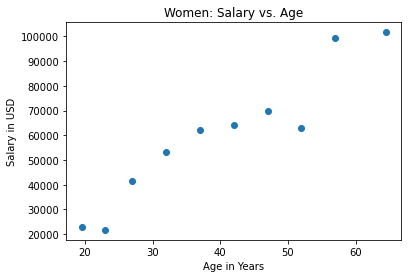

In [4]:
plt.scatter(Women.Age, Women.Salary)
plt.xlabel('Age in Years')
plt.ylabel('Salary in USD')
plt.title('Women: Salary vs. Age')
plt.show()

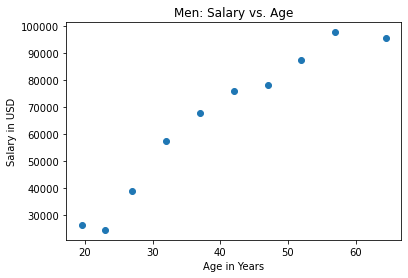

In [5]:
plt.scatter(Men.Age, Men.Salary)
plt.xlabel('Age in Years')
plt.ylabel('Salary in USD')
plt.title('Men: Salary vs. Age')
plt.show()

In [6]:
Women_X = Women['Age']
Men_X = Men['Age']

In [7]:
Women_X = Women.Age.values.reshape(-1, 1)
Men_X = Men.Age.values.reshape(-1, 1)

In [8]:
Women_y = Women.Salary
Men_y = Men.Salary

In [9]:
from sklearn.linear_model import LinearRegression
Women_model = LinearRegression()
Men_model = LinearRegression()

In [10]:
from sklearn.linear_model import LinearRegression
Women_model.fit(Women_X, Women_y)

LinearRegression()

In [11]:
Men_model.fit(Men_X, Men_y)

LinearRegression()

In [12]:
Women_y_pred = Women_model.predict(Women_X)
print(Women_y_pred.shape)

(10,)


In [13]:
Men_y_pred = Men_model.predict(Men_X)
print(Men_y_pred.shape)

(10,)


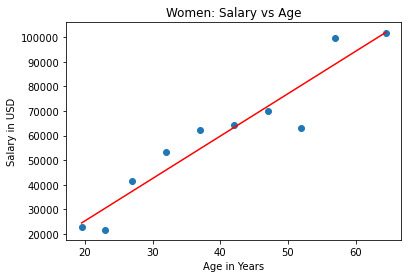

In [14]:
plt.scatter(Women_X, Women_y)
plt.plot(Women_X, Women_y_pred, color='red')
plt.xlabel('Age in Years')
plt.ylabel('Salary in USD')
plt.title('Women: Salary vs Age')
plt.show()

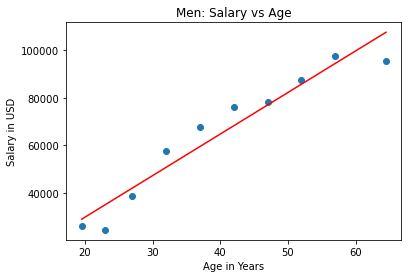

In [15]:
plt.scatter(Men_X, Men_y)
plt.plot(Men_X, Men_y_pred, color='red')
plt.xlabel('Age in Years')
plt.ylabel('Salary in USD')
plt.title('Men: Salary vs Age')
plt.show()

In [16]:
print(Women_model.coef_)
print(Women_model.intercept_)

[1721.7175105]
-9057.222775421404


In [17]:
print(Men_model.coef_)
print(Men_model.intercept_)

[1742.57012347]
-4898.860111994938


In [18]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
Women_X1 = sm.add_constant(Women_X)
result = sm.OLS(Women_y, Women_X1).fit()
#print dir(result)
print(result.rsquared, result.rsquared_adj)

0.9052892841480406 0.8934504446665457


In [19]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
Men_X1 = sm.add_constant(Men_X)
result = sm.OLS(Men_y, Men_X1).fit()
#print dir(result)
print(result.rsquared, result.rsquared_adj)

0.9301093622350991 0.9213730325144864


In [20]:
import statsmodels.api as sm
Women_X_train_Sm= sm.add_constant(Women_X)
Women_train_Sm= sm.add_constant(Women_X)
ls=sm.OLS(Women_y,Women_X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     76.47
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           2.29e-05
Time:                        21:13:37   Log-Likelihood:                -104.00
No. Observations:                  10   AIC:                             212.0
Df Residuals:                       8   BIC:                             212.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9057.2228   8380.538     -1.081      0.3